In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
from sklearn.preprocessing import StandardScaler
from LRGD import LinearRegressionGD
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [55]:
boston = datasets.load_boston()
data, y = boston.data, boston.target
data = pd.DataFrame(data)
data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
data['MEDV'] = y
X = data[['RM']].values
df = data

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA

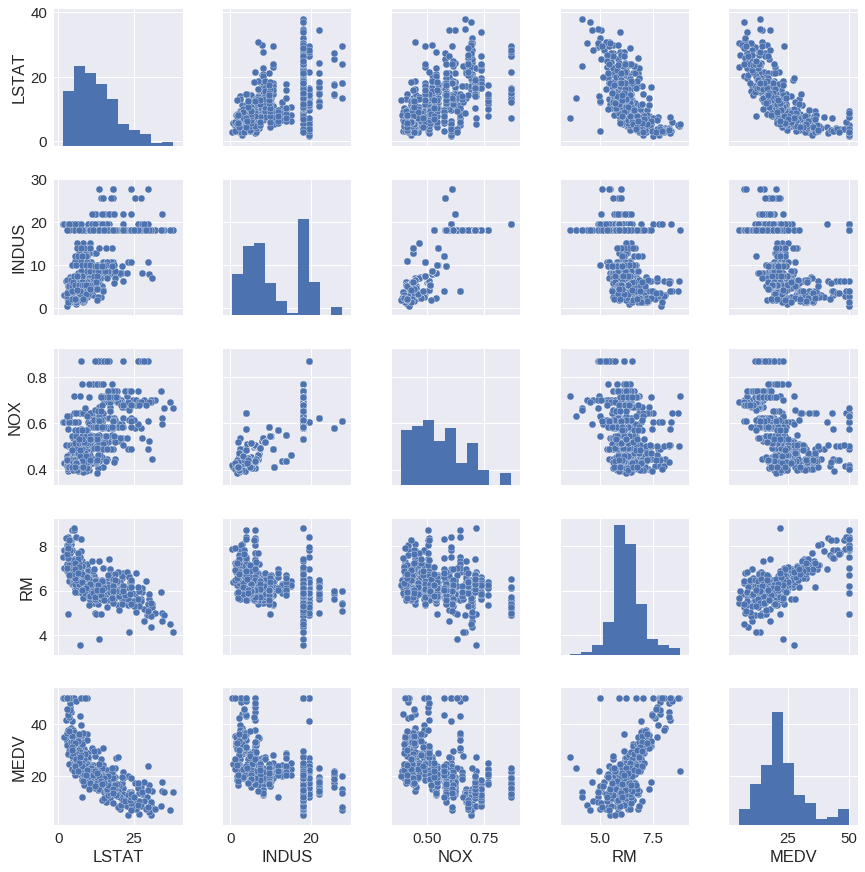

In [33]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.show()

In [34]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)

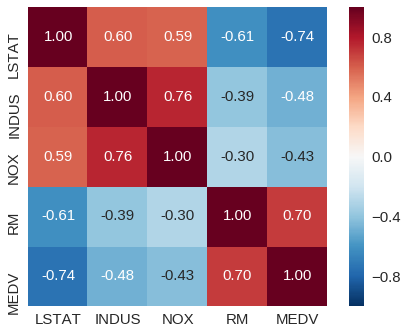

In [35]:
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [56]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [57]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

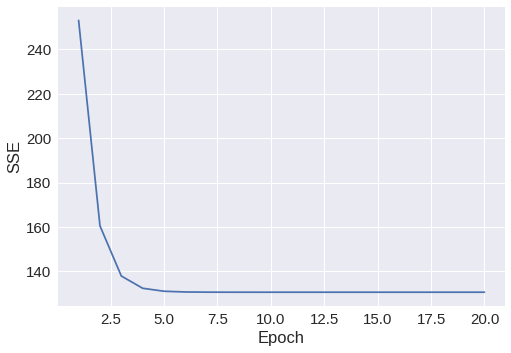

In [58]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

从图中，我们可以看到经过第5次迭代后，GD算法收敛了

In [59]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

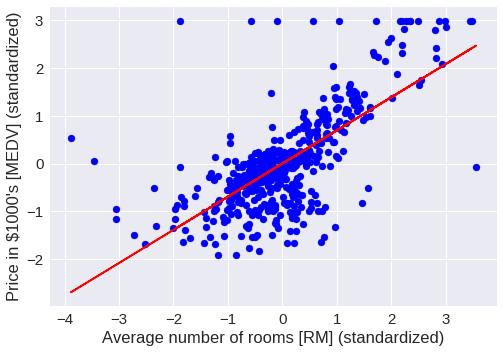

In [60]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

In [61]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### 注意:对于经过标准化处理的变量，我们无需更新其截距的权重，因为它们在y轴熵的截距始终为0

In [62]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' %lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [63]:
slr = LinearRegression()
slr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


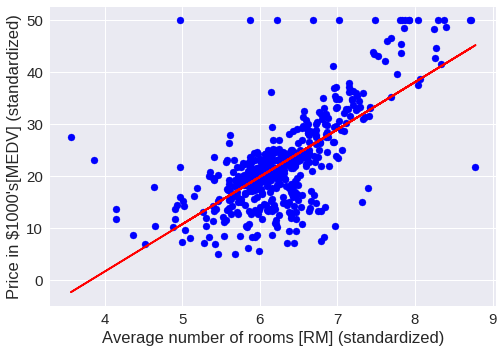

In [65]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s[MEDV] (standardized)')
plt.show()

In [67]:
#使用RANSAC拟合高鲁棒性回归模型
ransac = RANSACRegressor(LinearRegression(), max_trials=100,min_samples=50,residual_metric=lambda x:np.sum(np.abs(x),axis=1),residual_threshold=5.0,random_state=0)
ransac.fit(X,y)

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7f4eef2fb410>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

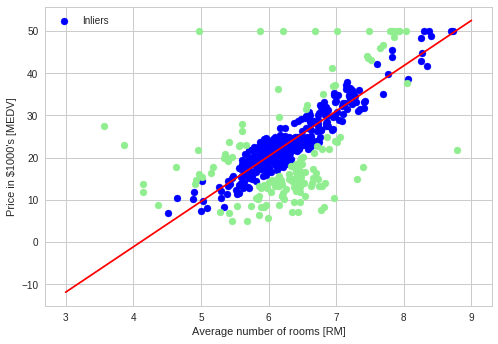

In [68]:
#使用RANSAC线性回归模型来获取内点和异常值的集合
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [69]:
#输出斜率和截距
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


虽然降低了异常点的潜在影响，但是无法确定该方法对未知数据的预测性能是否存在正面的影响。

In [73]:
X = data.iloc[:, :-1].values
y = data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

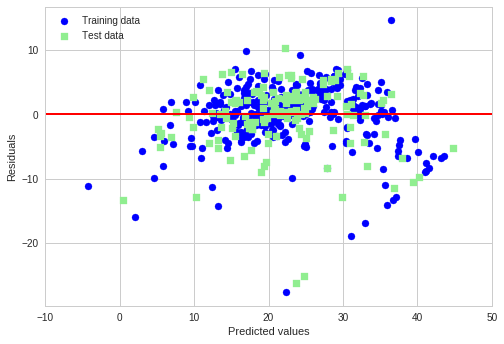

In [74]:
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [76]:
#输出均方误差
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.966, test: 27.184


In [78]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.764, test: 0.674


In [81]:
#岭回归，基于L2的模型
ridge = Ridge(alpha=1.0)

In [83]:
#LASSO，基于L1的模型
lasso = Lasso(alpha=1.0)

In [85]:
#ElasticNet(弹性网络),同时引入L1,L2,是前两种模型的折中模型
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
#了解更多的线性回归不同实现方式的更多信息，参见:http://scikit-learn.org/stable/modules/linear_model.html

In [87]:
#使用多项式回归
#训练集
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()

In [88]:
#拟合一个用于对比的简单线性回归模型
#测试集
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

#线性回归学习
lr.fit(X, y)
#线性回归预测
y_lin_fit = lr.predict(X_fit)

In [89]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
#使用经过转换后的特征针对多项式回归拟合一个多元线性回归模型
pr.fit(X_quad, y)
#多项式回归预测
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

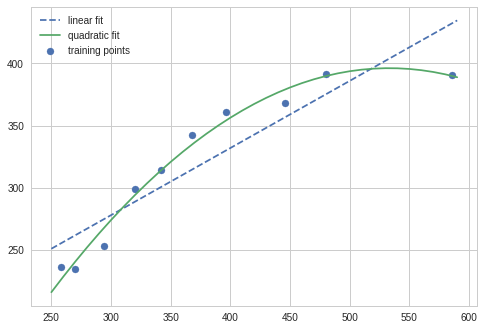

In [90]:
plt.scatter(X,y,label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [91]:
#两个模型评估
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
#对比两个模型的均方误差
print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
#对比两个模型的决定系数
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


In [92]:
#使用非线性模型对房屋价格和LSTAT（弱势群体人口所占比例）之间的关系进行建模
X = data[['LSTAT']].values
y = data['MEDV'].values
regr = LinearRegression()

#create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [93]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
print X_fit[:5]

[[ 1.73]
 [ 2.73]
 [ 3.73]
 [ 4.73]
 [ 5.73]]


In [94]:
#linear fit
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [95]:
#quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [96]:
#cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

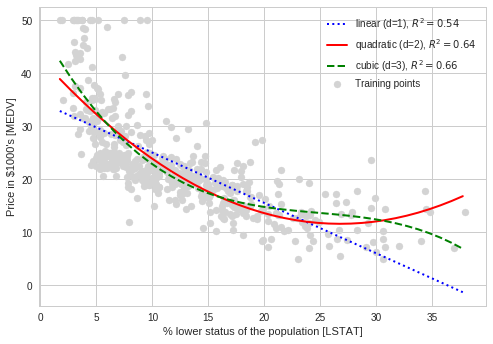

In [97]:
#画出3种拟合的效果图
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

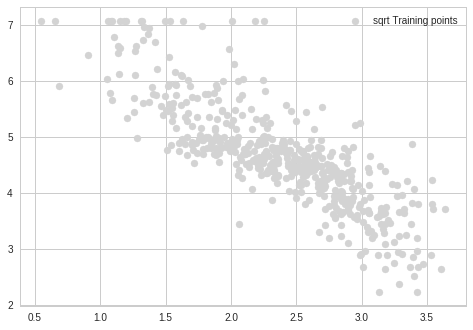

In [98]:
#特征映射
X_log = np.log(X)
y_sqrt = np.sqrt(y)
plt.scatter(X_log, y_sqrt, label='sqrt Training points', color='lightgray')
plt.legend(loc='upper right')
plt.show()

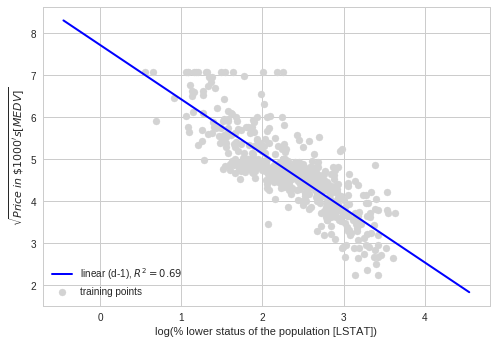

In [99]:
#fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

#plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d-1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

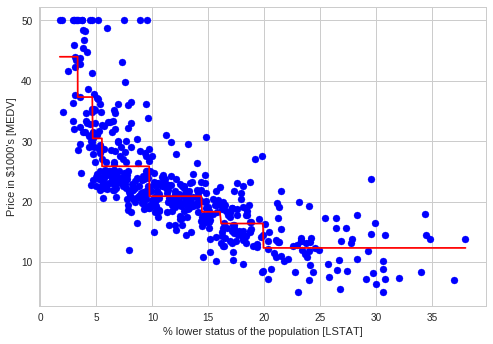

In [102]:
#使用决策树回归算法处理非线性关系
X = data[['LSTAT']].values
y = data[['MEDV']].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx],tree)

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [105]:
#随机森林回归算法处理非线性关系
X = data.iloc[:, :-1].values
y = data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 1.636, test: 11.070
R^2 train: 0.980, test: 0.877


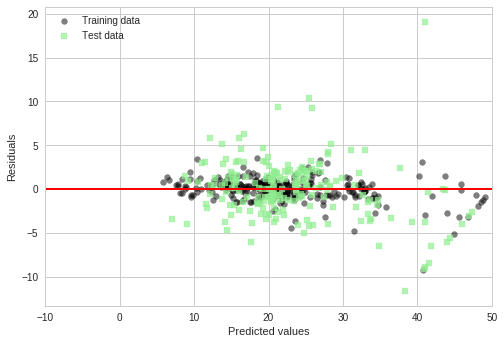

In [106]:
#看一下预测的残差
plt.scatter(y_train_pred, y_train_pred-y_train, c='black', marker='o', s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', s=35,alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()